In [1]:
import tensorflow as tf
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import os
import matplotlib.image as mpimg
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer

In [2]:
from glob import glob
image_count = len(list(glob('C:/Users/user/Downloads/tomato/train/*/*.jpg')))
print(image_count)

9999


In [3]:
list_ds = tf.data.Dataset.list_files(str('C:/Users/user/Downloads/tomato/train/*/*'), shuffle=False)
list_ds = list_ds.shuffle(image_count, reshuffle_each_iteration=False)
for f in list_ds.take(5):
    print(f.numpy())

b'C:\\Users\\user\\Downloads\\tomato\\train\\Tomato___healthy\\aadb9f92-d885-4a69-a498-437b1edeab90___RS_HL 9959.JPG'
b'C:\\Users\\user\\Downloads\\tomato\\train\\Tomato___Tomato_mosaic_virus\\Tomato___Tomato_mosaic_virus_original_96c9cc98-5faf-49ad-826b-11f3ecd64577___PSU_CG 2161.JPG_5d359ab5-5ebd-439a-b370-1ec3a3156610.JPG'
b'C:\\Users\\user\\Downloads\\tomato\\train\\Tomato___Tomato_Yellow_Leaf_Curl_Virus\\e98e9e88-f0c9-4d56-b3ce-47e9129d2236___UF.GRC_YLCV_Lab 02594.JPG'
b'C:\\Users\\user\\Downloads\\tomato\\train\\Tomato___Bacterial_spot\\dfce64d1-9954-4922-8beb-2681e2e6b896___GCREC_Bact.Sp 2961.JPG'
b'C:\\Users\\user\\Downloads\\tomato\\train\\Tomato___Leaf_Mold\\Tomato___Leaf_Mold_original_e40291b5-6b55-4c56-a044-3971e70eda1e___Crnl_L.Mold 7164.JPG_2ad816ee-e6e5-425f-a4f2-e9c056d777c8.JPG'


In [4]:
import pathlib
batch_size = 32
img_height = 180
img_width = 180
data_dir = pathlib.Path('C:/Users/user/Downloads/tomato/train/')
#data_dir1 = pathlib.Path('C:/Users/user/Downloads/tomato/val/')

# Training Dataset

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10000 files belonging to 10 classes.
Using 8000 files for training.


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 10000 files belonging to 10 classes.
Using 2000 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


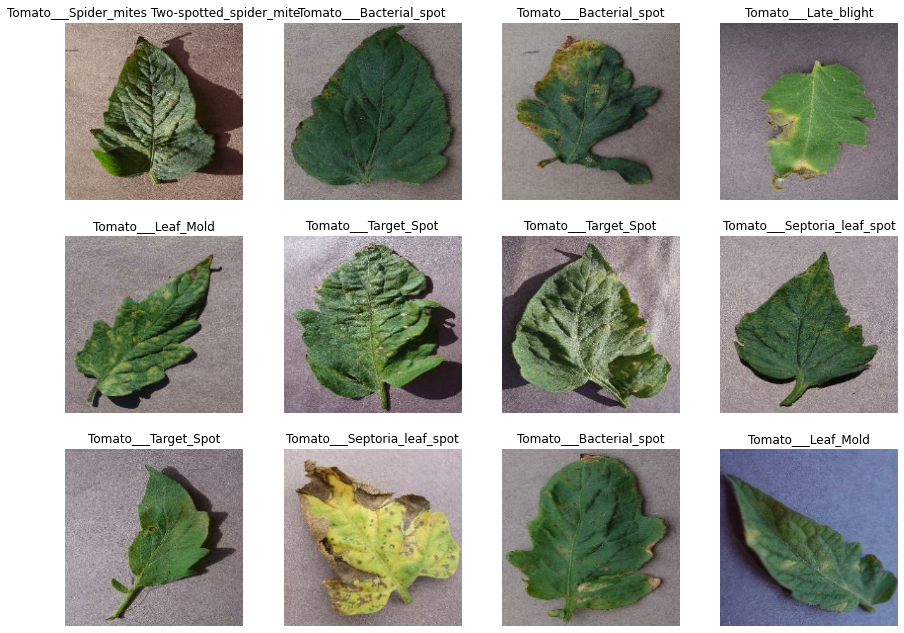

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
    for i in range(12):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

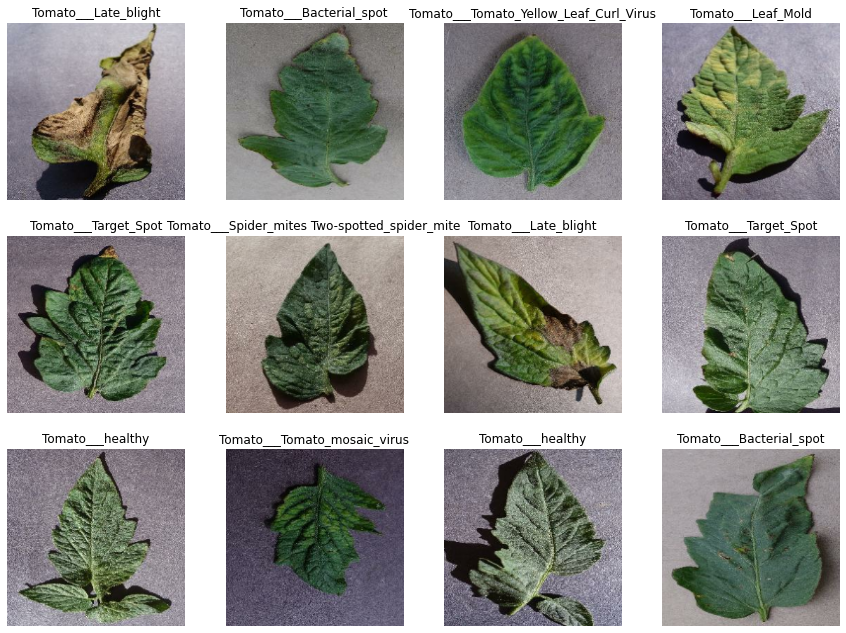

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
for images, labels in val_ds.take(1):
    for i in range(12):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# Data Augmentation

In [10]:
from tensorflow.keras import layers
IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


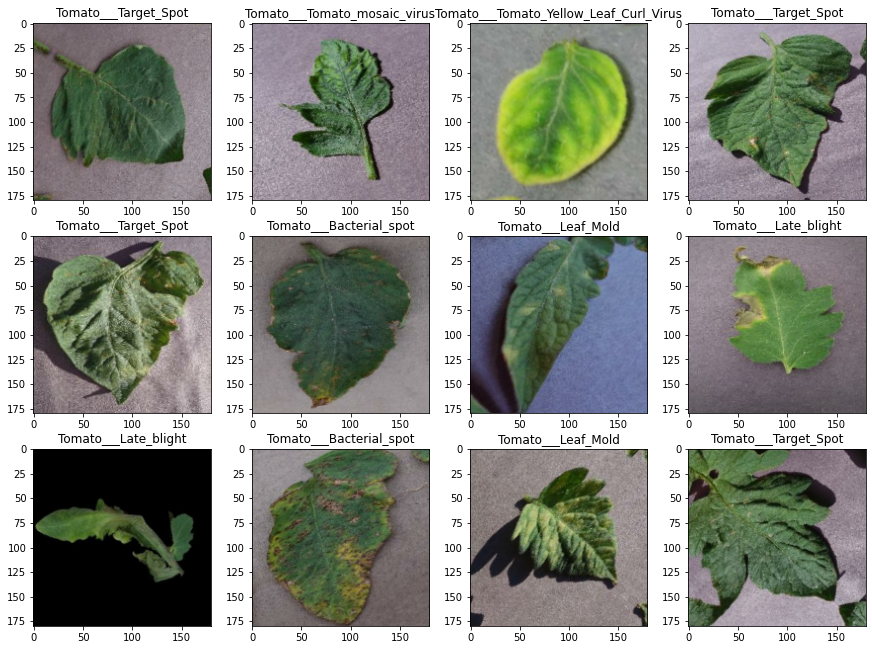

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
    for i in range(12):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])

In [12]:
val_ds = val_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

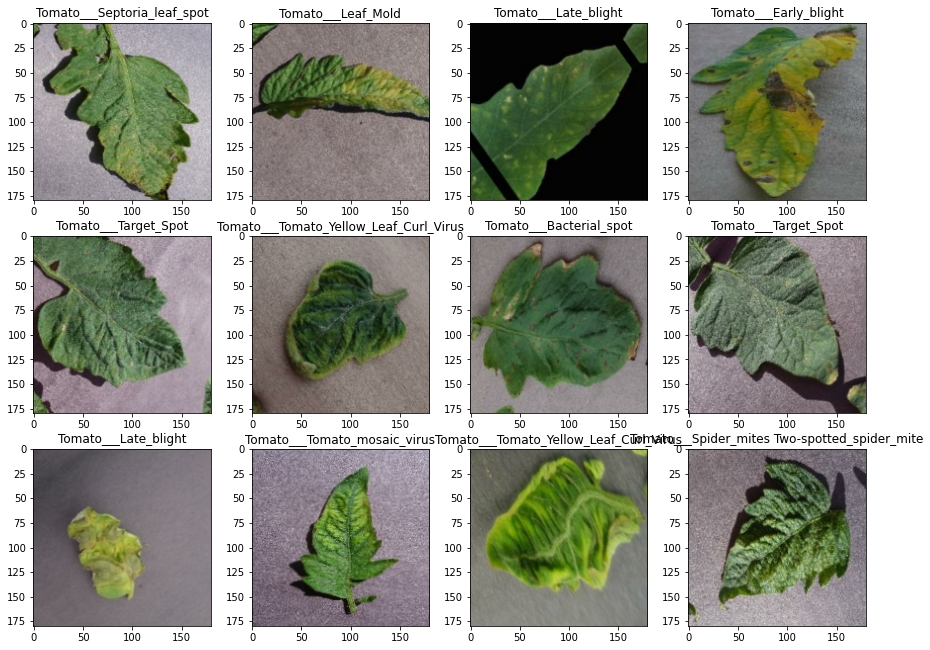

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
    for i in range(12):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])

In [14]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [35]:
model = tf.keras.Sequential([
  #tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.BatchNormalization(axis = -1),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.BatchNormalization(axis = -1),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.BatchNormalization(axis = -1),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [36]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics=['accuracy'])

In [37]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=30
)

Epoch 1/30
250/250 [==============================] - 970s 4s/step - loss: 1.1098 - accuracy: 0.6695 - val_loss: 1.7320 - val_accuracy: 0.5985
Epoch 2/30
250/250 [==============================] - 739s 3s/step - loss: 0.6077 - accuracy: 0.7960 - val_loss: 9.5606 - val_accuracy: 0.3065
Epoch 3/30
250/250 [==============================] - 734s 3s/step - loss: 0.4808 - accuracy: 0.8380 - val_loss: 1.6630 - val_accuracy: 0.6215
Epoch 4/30
250/250 [==============================] - 744s 3s/step - loss: 0.2578 - accuracy: 0.9106 - val_loss: 1.0240 - val_accuracy: 0.7280
Epoch 5/30
250/250 [==============================] - 1388s 6s/step - loss: 0.1647 - accuracy: 0.9444 - val_loss: 1.3041 - val_accuracy: 0.6885
Epoch 6/30
250/250 [==============================] - 821s 3s/step - loss: 0.1321 - accuracy: 0.9560 - val_loss: 0.8927 - val_accuracy: 0.7580
Epoch 7/30
250/250 [==============================] - 842s 3s/step - loss: 0.1018 - accuracy: 0.9653 - val_loss: 1.1453 - val_accuracy: 0.735

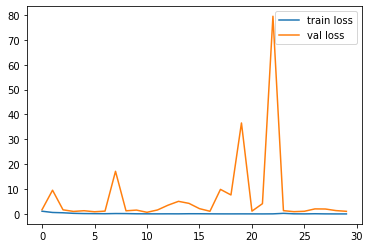

In [40]:
plt.plot(model.history.history['loss'], label='train loss')
plt.plot(model.history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

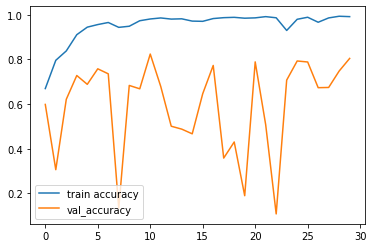

In [41]:
plt.plot(model.history.history['accuracy'], label='train accuracy')
plt.plot(model.history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()